In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Sigmoid

The logistic sigmoid function is,

\begin{equation*}
S\left(x\right) = \frac{1}{1+e^{-x+\alpha}}
\end{equation*}

Here, α is the offset parameter to set the value at which the sigmoid evaluates to 0. Let's plot it and then discuss it's disadvantages.

In [2]:
""" The logistic sigmoid function """
def sigmoid(arr, offset):
    a = []
    for x in arr:
        a.append(1 / (1+np.exp(-x+offset)))
    
    return a

In [3]:
X = np.arange(-10, 10, .2)
Y = np.linspace(0, len(X), len(X))

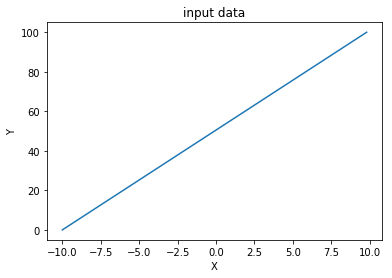

In [4]:
""" Let's plot the input data """
fig = plt.figure()
plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('input data')
fig.savefig('figures/data.png')
plt.show()

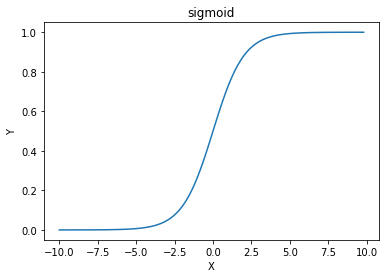

In [5]:
sig = sigmoid(X, 0)

fig = plt.figure()
plt.plot(X, sig)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('sigmoid')
fig.savefig('figures/sigmoid.png')
plt.show()

So what happens if we were to sum many of these functions, all with a different bias/offset?

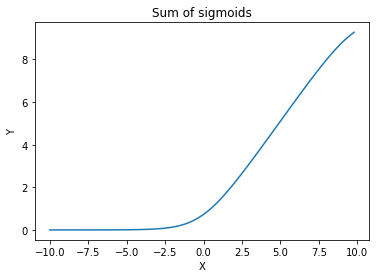

In [6]:
nb_sum = 10 # number of logistics to sum
offsets = np.linspace(0, np.max(X), 100)

sig_sum = np.zeros(np.shape(X))

for offset in offsets:
    sig_sum += sigmoid(X, offset)

sig_sum = sig_sum / nb_sum

fig = plt.figure()
plt.plot(X, sig_sum)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sum of sigmoids')
fig.savefig('figures/sum_sigmoids.png')
plt.show()

#### Problem with Sigmoid:

Sigmoid gets saturated for large values of x. Thus, as the activation value increases the gradient approaches to 0, and the corresponding neurons learn nothing.

The sum of sigmoids is better than sigmoid as it does not saturate at the top. But the sum is harder to calculate. It turns out that we have a better way to do this. Here is an approximation of the sum of sigmoids,

\begin{equation*}
f\left(x\right) = ln\left(1 + e^x\right)
\end{equation*}

In [7]:
def sum_of_sigmoid_approx(x):
    return np.log(1 + np.exp(x))

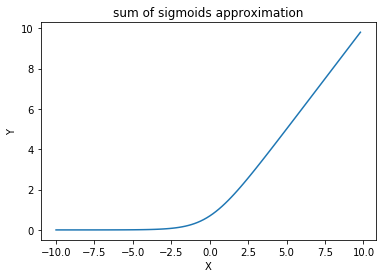

In [8]:
ss_approx = sum_of_sigmoid_approx(X)

fig = plt.figure()
plt.plot(X, ss_approx)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('sum of sigmoids approximation')
fig.savefig('figures/sum_sigmoids_approx.png')
plt.show()

But do we really need the ``log`` and the ``exp``, or could we just take ``max(0, x)``? And that works fine, thus giving you the ReLU.

### ReLU

In context of artificial neural networks, a rectifier is defined as,

\begin{equation*}
f\left(x\right) = max\left(0, x\right)
\end{equation*}

Here, x the input to a neuron. This is also known as the ramp function. A unit employing the rectifier is called the rectified linear unit (ReLU).

In [9]:
def relu(x):
    return np.maximum(0, x)

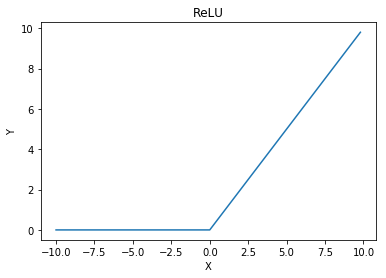

In [10]:
relu1 = relu(X)

fig = plt.figure()
plt.plot(X, relu1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('ReLU')
fig.savefig('figures/relu.png')
plt.show()

#### Problem with ReLU:

The problem with relu is that it’s mean is not zero. A positive mean introduces a bias for the next layer which can slow down the learning. If the mean value of activation is zero we get a faster learning.

In [11]:
np.mean(relu1)

2.449999999999974

### Behold the ELU

With Exponential Linear Units (ELU), we can have a mean activation that is close to 0 and it is an exponential function. ELU does not saturate for large values of x. It is expressed as,

\begin{split}f(x) = \left \{ \begin{array}{ll}
x & {\rm if}~ x \ge 0 \\
\alpha (\exp(x) - 1) & {\rm if}~ x < 0,
\end{array} \right.\end{split}

where α is a parameter. See: https://arxiv.org/abs/1511.07289

In plain English, it acts like a ReLU unit if x is positive, but for negative values it is a function bounded by a fixed value ``-1``, for ``alpha=1``. This behavior helps to push the mean activation of neurons closer to zero which is beneficial for learning and it helps to learn representations that are more robust to noise.

In [12]:
def elu(arr, alpha):
    a = []
    for x in arr:
        if x >= 0:
            a.append(x)
        else:
            a.append(alpha * (np.exp(x)-1))
    
    return a

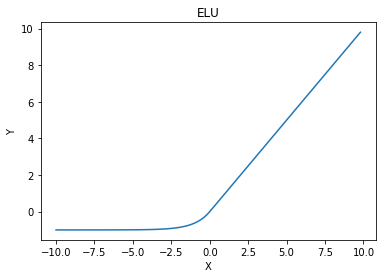

In [13]:
elu1 = elu(X, 1.0)

fig = plt.figure()
plt.plot(X, elu1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('ELU')
fig.savefig('figures/elu.png')
plt.show()

In [14]:
np.mean(elu1)

1.9951645051027873